In [1]:
import sys
sys.path.append("../")
from tfMFs.tfCMF import tfCMF
from dataset import create_synthetic_data
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

In [18]:
X, y = create_synthetic_data(
    num_pos_users=2000, 
    num_neg_users=2000, 
    num_random_words=10000,
    lam=None, 
    shape=0.1, 
    scale=0.5
)

In [20]:
y = y[:,np.newaxis]

In [21]:
train_data = X.A
test_data = X.A

In [25]:
cmf = tfCMF(y, alpha=0.7, d_hidden=10, lamda=1)

In [26]:
U, V, Z, train_loss_SGD, _ = cmf.train(train_data, test_data, optim_steps=100, verbose=10, early_stopping=5, lr=0.001, optimizer="SGD")

[Info] At time-step 0, test data rmse loss is -381178.625
[Info] At time-step 10, test data rmse loss is -412136.40625
[Info] At time-step 20, test data rmse loss is -412683.9375
[Info] At time-step 30, test data rmse loss is -412863.65625
[Info] At time-step 40, test data rmse loss is -412946.09375
[Info] At time-step 50, test data rmse loss is -412994.8125
[Info] At time-step 60, test data rmse loss is -413028.03125
[Info] At time-step 70, test data rmse loss is -413052.71875
[Info] At time-step 80, test data rmse loss is -413072.1875
[Info] At time-step 90, test data rmse loss is -413088.125


In [27]:
cmf = tfCMF(y, alpha=0.7, d_hidden=10, lamda=1)

In [28]:
U, V, Z, train_loss_Adam, _ = cmf.train(train_data, test_data, optim_steps=100, verbose=10, early_stopping=5,lr=0.001, optimizer="Adam")

[Info] At time-step 0, test data rmse loss is -381178.625
[Info] At time-step 10, test data rmse loss is -388275.9375
[Info] At time-step 20, test data rmse loss is -394152.0625
[Info] At time-step 30, test data rmse loss is -398855.09375
[Info] At time-step 40, test data rmse loss is -402473.09375
[Info] At time-step 50, test data rmse loss is -405149.53125
[Info] At time-step 60, test data rmse loss is -407068.4375
[Info] At time-step 70, test data rmse loss is -408419.15625
[Info] At time-step 80, test data rmse loss is -409364.4375
[Info] At time-step 90, test data rmse loss is -410027.625


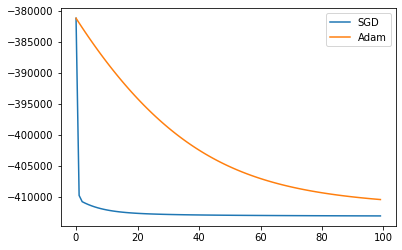

In [29]:
plt.plot(np.arange(0,100),train_loss_SGD, label="SGD")
plt.plot(np.arange(0,100),train_loss_Adam, label="Adam")
plt.legend()
plt.show()